In [5]:
#Importing necessary libraries for data extract, visualization, and model testing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

#import warnings
#warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('C:/Users/mcthu/Code Projects/Machine_Learning/google-stock-price-prediction/GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


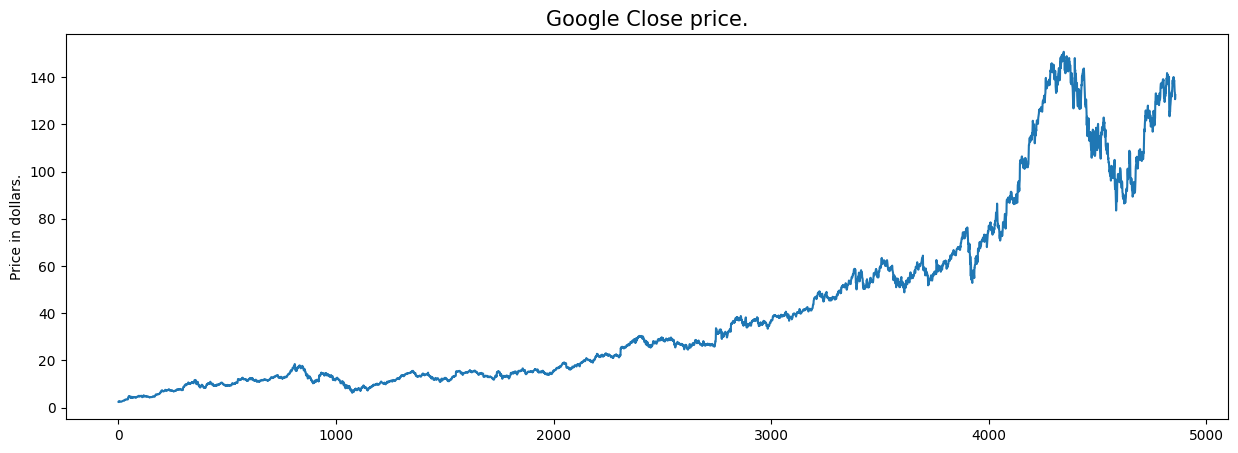

In [8]:
#Basic Data Visualization to gather general idea of data
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Google Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [10]:
df[df['Close'] == df['Adj Close']].shape
df = df.drop(['Adj Close'], axis=1)
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [14]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']



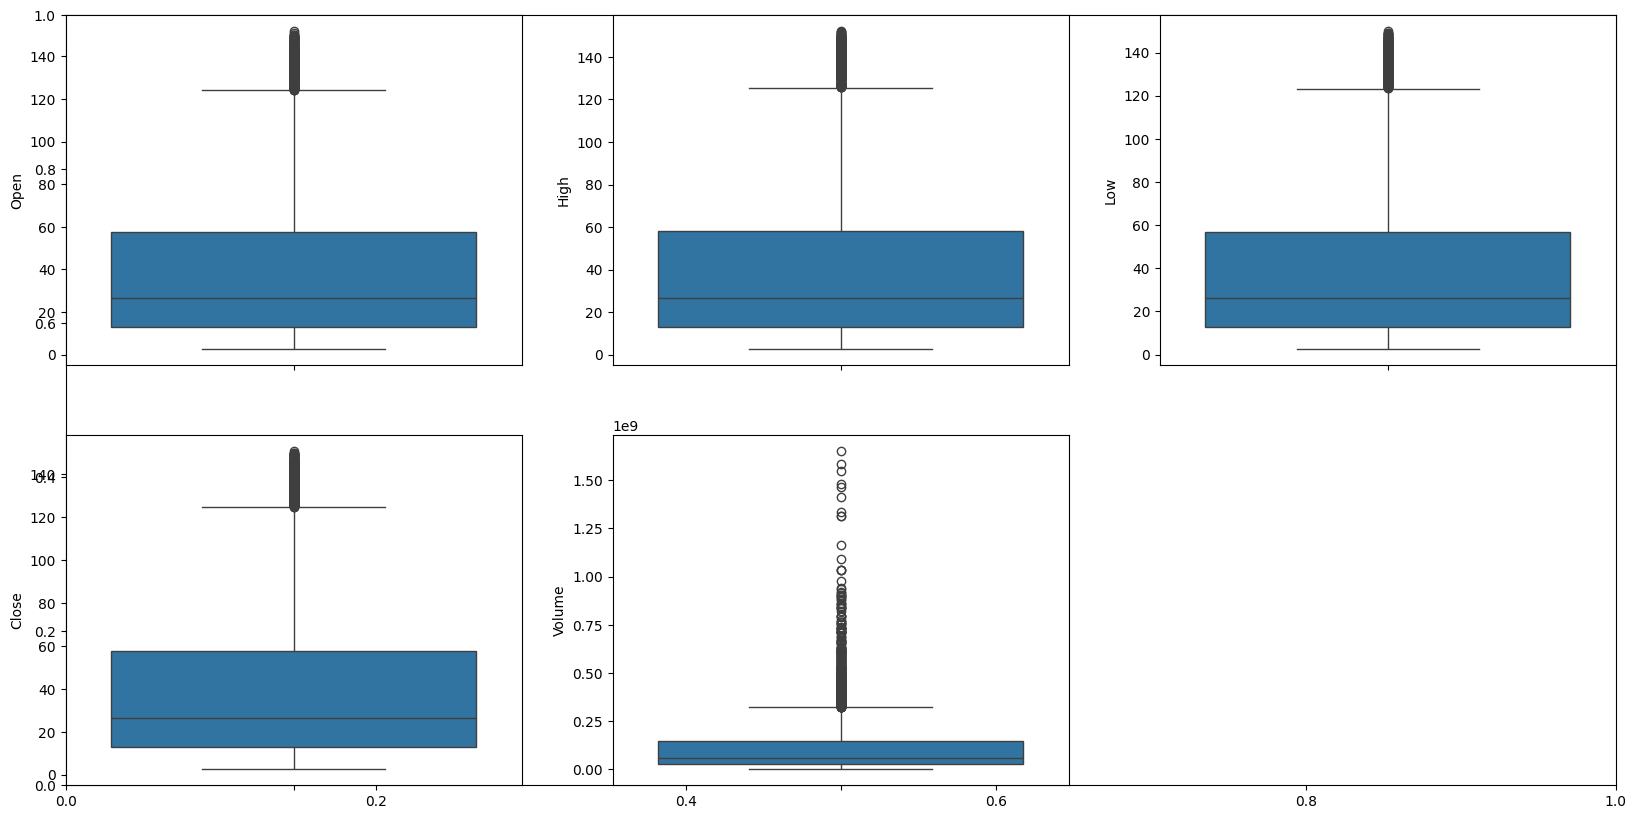

In [15]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [18]:
#Creating three more columns not originally provided in dataset, derived from the Date column
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype(int)
df['month'] = splitted[1].astype(int)
df['day'] = splitted[2].astype(int)

df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216,2004,8,19
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,2004,8,20
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,2004,8,23
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,2004,8,24
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,2004,8,25


In [19]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216,2004,8,19,0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,2004,8,20,0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,2004,8,23,0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,2004,8,24,0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,2004,8,25,0


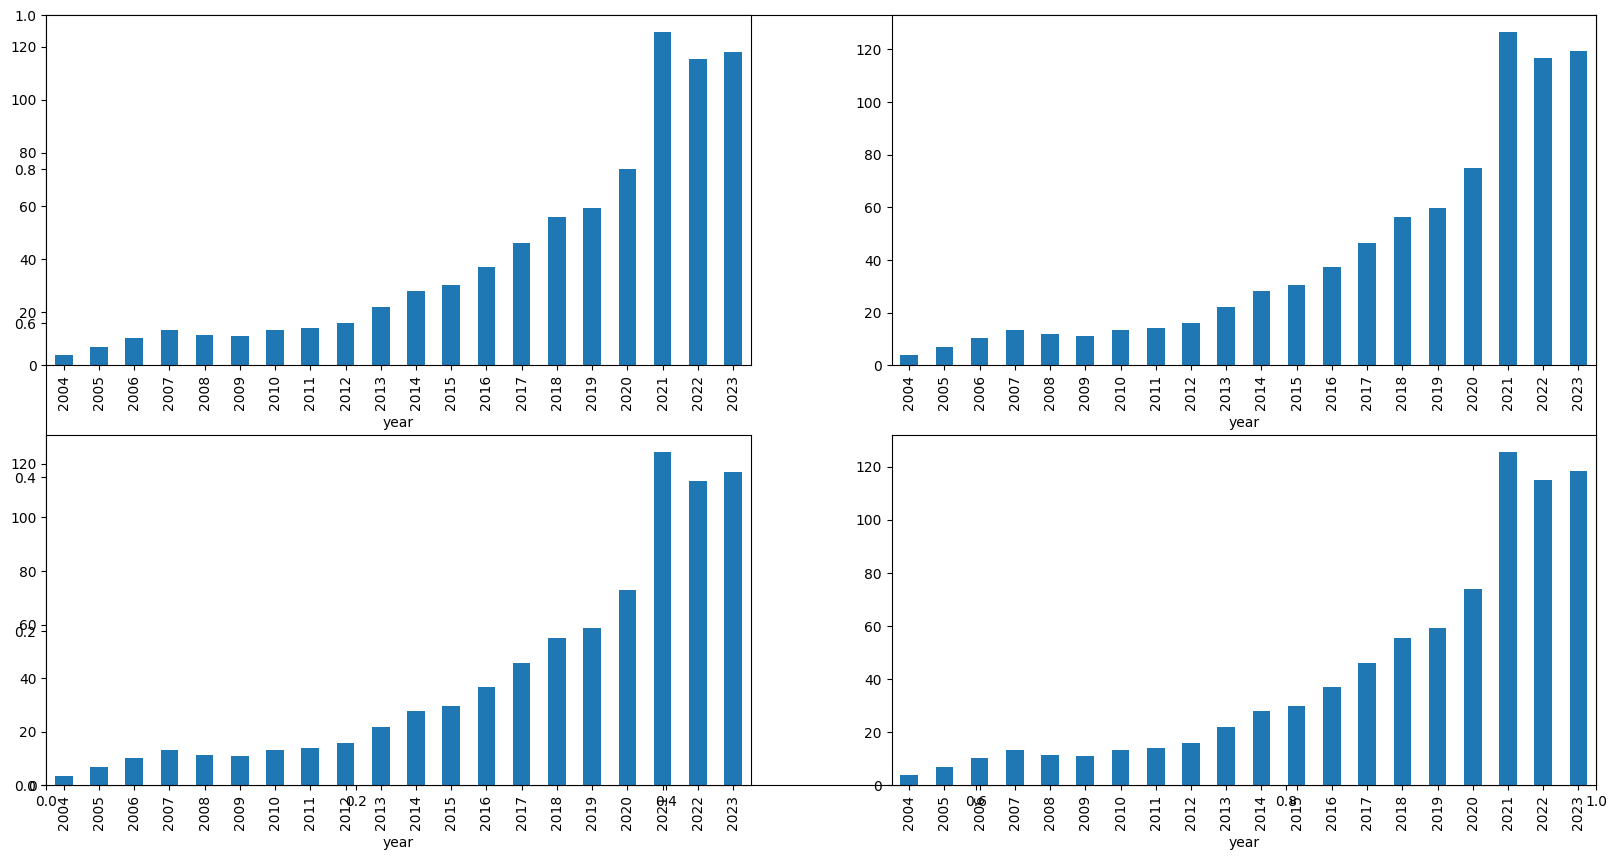

In [20]:
# Visualization by bar graph
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [21]:
# Data Observation - Prices are lower in the months which are quarter end as compared to that of the non-quarter end months
# Also, volume of trades is lower in months which are quarter end
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,year,month,day
is_quarter_end,,,,,,,,
0,41.707116,42.161610,41.288374,41.737486,1.228721e+08,2013.836957,6.159938,15.729503
1,41.025153,41.436318,40.597686,41.016550,1.111368e+08,2013.644689,7.463370,15.771062
